In [4]:
!pip install emnist

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, BatchNormalization, Flatten, Dropout
from keras.utils import to_categorical
import emnist

In [6]:
(x_train, y_train), (x_test, y_test) = emnist.extract_training_samples('letters'), emnist.extract_test_samples('letters')

In [7]:
x_train.shape

(124800, 28, 28)

In [8]:
y_train.shape

(124800,)

In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
x_train = x_train.reshape((124800, 28, 28, 1))
x_test = x_test.reshape((20800,28,28,1))

In [11]:
x_train.shape

(124800, 28, 28, 1)

In [12]:
x_train[0].shape

(28, 28, 1)

In [13]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [14]:
# Build the model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), padding="valid",activation="relu",input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 2 , padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3), padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 1 , padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(27,activation="sigmoid"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 11, 11, 32)        128       
 chNormalization)                                                
                                                        

In [16]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
3900/3900 [==============================] - 25s 5ms/step - loss: 0.4924 - accuracy: 0.8477 - val_loss: 0.2695 - val_accuracy: 0.9152
Epoch 2/5
3900/3900 [==============================] - 21s 5ms/step - loss: 0.2785 - accuracy: 0.9099 - val_loss: 0.2432 - val_accuracy: 0.9215
Epoch 3/5
3900/3900 [==============================] - 19s 5ms/step - loss: 0.2311 - accuracy: 0.9247 - val_loss: 0.2085 - val_accuracy: 0.9330
Epoch 4/5
3900/3900 [==============================] - 26s 7ms/step - loss: 0.2038 - accuracy: 0.9315 - val_loss: 0.2192 - val_accuracy: 0.9287
Epoch 5/5
3900/3900 [==============================] - 20s 5ms/step - loss: 0.1841 - accuracy: 0.9375 - val_loss: 0.2048 - val_accuracy: 0.9365


In [18]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

650/650 [==============================] - 2s 2ms/step - loss: 0.2048 - accuracy: 0.9365
Test accuracy: 0.9364903569221497


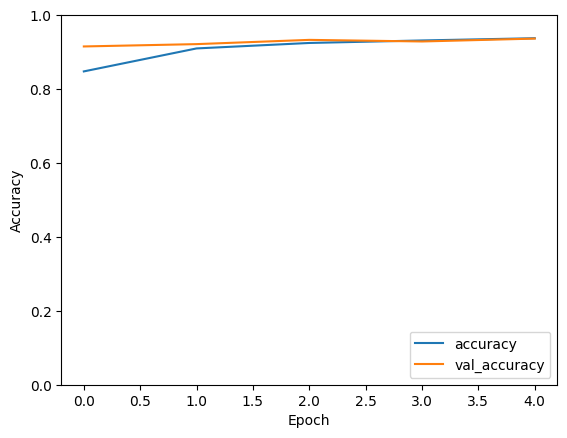

In [19]:
import matplotlib.pyplot as plt
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [97]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import string

In [98]:
# Create a list of all small letters
small_letters = list(string.ascii_lowercase)
small_letters.insert(0,'N/A')

In [239]:
image_path = '/content/B.jpg'

In [240]:
original_image = cv2.imread(image_path)
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

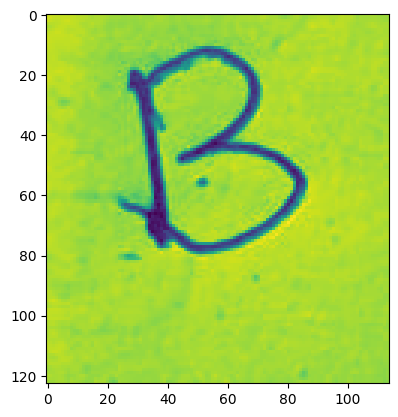

In [241]:
plt.imshow(original_image)

In [242]:
original_image = cv2.resize(original_image,(28,28))

In [243]:
original_image = original_image/255

In [244]:
test_img = original_image.reshape((1,28,28,1))

In [245]:
prediction = model.predict(test_img)
ans = np.where(prediction == prediction.max())

1/1 [==============================] - 0s 23ms/step


In [246]:
prediction

array([[2.3891722e-11, 9.4939733e-01, 9.8775184e-01, 1.5754566e-02,
        3.6744434e-01, 7.7137536e-01, 8.3326530e-03, 9.9796247e-01,
        2.7302713e-05, 7.5218675e-04, 1.5071772e-02, 9.0798085e-06,
        5.0234626e-04, 5.2756408e-05, 6.6795470e-03, 8.8742721e-01,
        8.1293958e-01, 9.9782604e-01, 4.5700662e-02, 3.1932852e-01,
        4.7133927e-04, 2.6756749e-04, 4.6967791e-05, 2.0974645e-04,
        2.8498310e-03, 1.0243583e-02, 2.6584101e-01]], dtype=float32)

In [247]:
print(f"The prediction is {small_letters[ans[1][0]]}")

The prediction is g


In [230]:
def image_preprocess(image_path):
  #convert to gray scale
  image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)/255

  image = cv2.resize(image,(28,28))

  image = image.reshape((1,28,28,1))

  return image

In [231]:
def image_prediction(image_path):
  image = image_preprocess(image_path)

  prediction = model.predict(image)
  ans = np.where(prediction == prediction.max())

  print(f"The prediction of image is {small_letters[ans[1][0]]}")

In [232]:
img_path = '/content/B.jpg'
image_prediction(img_path)

1/1 [==============================] - 0s 77ms/step
The prediction of image is g
